In [21]:
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
import io

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns',None) #display all columns
pd.set_option('display.max_rows',None) #display all rows

# Required Input files
# When running for the very first time, `ipl2025_results.csv`` file is required with all the team managers and an initial row of 0s.
# IPL2025MockAuctionSummary.csv file is required with each of the managers, their teams and their players listed.

# Dependencies to install
#  pip3 install beautifulsoup4
#  pip3 install lxml ??? (Double check if required)
#  pip3 install html5lib ??? (Double check if required)
#  pip3 install pywhatkit
#  pip3 install matplotlib
#  pip3 install selenium
#  pip3 install tabulate

In [ ]:
import sys
from datetime import date

# Backup the input and output files for each day for posterity

# Change for each day
ipl_day_0 = date(2026, 2, 6)
ipl_day_cur = date.today()
day_num = abs((ipl_day_cur - ipl_day_0).days)
day = 'day_' + str(day_num)
prev_day = 'day_' + str(day_num - 1)
print(day_num)

# Change for each group
group = sys.argv[1]
print(group)
tournament = 't20_wc_2026'
results_file = f'./{group}/{tournament}_results_{day}.csv'
prev_results_file = f'./{group}/{tournament}_results_{prev_day}.csv'
leaderboard_graph_file = f'./{group}/{tournament}_leaderboard.png'
leaderboard_file = f'./{group}/{tournament}_leaderboard.txt'

ipl_mock_auction_summary = f'./{group}/AuctionSummary.csv'

3
group_1


In [24]:
mvp_df = pd.read_csv(f'./data/mvp_{day}.csv')
mvp_df

,Player,Player Short Name,Team,Position,Pts
0,george munsey,g munsey,scot,bat,298
1,michael leask,m leask,scot,bowl,238
2,romario shepherd,r shepherd,wi,alr,207
3,suryakumar yadav,s yadav,ind,bat,206
4,tim seifert,t seifert,nz,wk,172
5,shimron hetmyer,s hetmyer,wi,bat,170
6,brandon mcmullen,b mcmullen,scot,alr,169
7,shadley van schalkwyk,s van schalkwyk,usa,alr,159
8,blessing muzarabani,b muzarabani,zim,bowl,157
9,richard ngarava,r ngarava,zim,bowl,154


In [25]:
fantasy_teams_auction_df = pd.read_csv(ipl_mock_auction_summary)
fantasy_teams_auction_df

,AkshayM,ColdTaker,Sriram,ds&ps,mahaarajanmg,neela,ntkesh,sk,sudarshan
0,harry brook,sanju samson,saim ayub,glenn maxwell,devon conway,matt henry,phil salt,james neesham,roston chase
1,nathan ellis,cameron green,adil rashid,romario shepherd,glenn phillips,kusal perera,jamie overton,sam curran,marco jansen
2,brendan taylor,tim seifert,jacob duffy,paul stirling,george linde,rashid khan,ibrahim zadran,mitchell santner,jason holder
3,rinku singh,abhishek sharma,tim david,josh inglis,axar patel,sikandar raza,salman agha,fazalhaq farooqi,sahibzada farhan
4,darwish rasooli,mohammad nabi,ryan rickelton,shimron hetmyer,keshav maharaj,sherfane rutherford,aiden markram,kamindu mendis,matheesha pathirana
5,abrar ahmed,fakhar zaman,shivam dube,will jacks,ben duckett,travis head,noor ahmad,ishan kishan,naseem shah
6,mohammad nawaz,mujeeb ur rahman,pathum nissanka,jos buttler,arshdeep singh,quinton de kock,hardik pandya,suryakumar yadav,jason smith
7,khawaja nafay,maheesh theekshana,xavier bartlett,mitchell marsh,shai hope,rovman powell,lockie ferguson,kagiso rabada,adam zampa
8,dushmantha chameera,lungi ngidi,tilak varma,shamar joseph,rahmanullah gurbaz,jofra archer,varun chakravarthy,jasprit bumrah,dewald brevis
9,shadab khan,wanindu hasaranga,cooper connolly,anrich nortje,eshan malinga,daryl mitchell,brandon king,dasun shanaka,david miller


In [26]:
fantasy_mgrs = fantasy_teams_auction_df.columns
fantasy_mgrs.to_list()

['AkshayM',
 'ColdTaker',
 'Sriram',
 'ds&ps',
 'mahaarajanmg',
 'neela',
 'ntkesh',
 'sk',
 'sudarshan']

In [27]:
import os
#Create new dataframe for manager_players
fantasy_teams_df = fantasy_teams_auction_df.apply(lambda x: x.astype(str).str.lower())

fantasy_teams_df_per_mgr = {}
for mgr in fantasy_teams_df.columns:
    mgr_file = f'./{group}/{mgr}.csv'
    if not os.path.exists(mgr_file):
        df = pd.DataFrame(fantasy_teams_df[mgr])
        df.to_csv(mgr_file, index=False)
    else:
        df = pd.read_csv(mgr_file)
    fantasy_teams_df_per_mgr[mgr] = df
fantasy_teams_df


,AkshayM,ColdTaker,Sriram,ds&ps,mahaarajanmg,neela,ntkesh,sk,sudarshan
0,harry brook,sanju samson,saim ayub,glenn maxwell,devon conway,matt henry,phil salt,james neesham,roston chase
1,nathan ellis,cameron green,adil rashid,romario shepherd,glenn phillips,kusal perera,jamie overton,sam curran,marco jansen
2,brendan taylor,tim seifert,jacob duffy,paul stirling,george linde,rashid khan,ibrahim zadran,mitchell santner,jason holder
3,rinku singh,abhishek sharma,tim david,josh inglis,axar patel,sikandar raza,salman agha,fazalhaq farooqi,sahibzada farhan
4,darwish rasooli,mohammad nabi,ryan rickelton,shimron hetmyer,keshav maharaj,sherfane rutherford,aiden markram,kamindu mendis,matheesha pathirana
5,abrar ahmed,fakhar zaman,shivam dube,will jacks,ben duckett,travis head,noor ahmad,ishan kishan,naseem shah
6,mohammad nawaz,mujeeb ur rahman,pathum nissanka,jos buttler,arshdeep singh,quinton de kock,hardik pandya,suryakumar yadav,jason smith
7,khawaja nafay,maheesh theekshana,xavier bartlett,mitchell marsh,shai hope,rovman powell,lockie ferguson,kagiso rabada,adam zampa
8,dushmantha chameera,lungi ngidi,tilak varma,shamar joseph,rahmanullah gurbaz,jofra archer,varun chakravarthy,jasprit bumrah,dewald brevis
9,shadab khan,wanindu hasaranga,cooper connolly,anrich nortje,eshan malinga,daryl mitchell,brandon king,dasun shanaka,david miller


In [28]:
from thefuzz import fuzz
from thefuzz import process
            
# Compute total score for each fantasy team based on MVP points of each player
scores = { fantasy_mgr:0 for fantasy_mgr in fantasy_mgrs.to_list() }
for mgr in fantasy_mgrs:
    print(mgr)
    mgr_df = fantasy_teams_df_per_mgr[mgr]
    mgr_day_pts = {}
    mgr_file = f'./{group}/{mgr}.csv'
    all_players_have_min_pts = True
    mvp_players_with_pts = mvp_df['Player'].to_list()
    for i in range(len(fantasy_teams_df[mgr])):
        player_name = str(fantasy_teams_df[mgr].iloc[i]).lower()
        if player_name in mvp_players_with_pts:
            player_score = float(mvp_df.loc[mvp_df['Player'] == fantasy_teams_df[mgr].iloc[i],'Pts'].iloc[0])
            scores[mgr] += player_score
            mgr_day_pts[player_name] = player_score
            print(f'\t{player_name} points found. Adding his score {player_score} to total. New score {scores[mgr]}')
        else:
            closest_match = process.extractOne(player_name, mvp_players_with_pts)
            mgr_day_pts[player_name] = 0.0
            print(f'\t{player_name} not found in mvp_table... Double check the spelling of player name, closest match is {closest_match}')
            all_players_have_min_pts = False
    mgr_df[f'{day}'] = mgr_df.iloc[:, 0].map(mgr_day_pts)
    mgr_df = mgr_df.reindex(sorted(mgr_df.columns, key = lambda x: int(x.split("_")[1] if '_' in x else 0)), axis=1)
    mgr_df.to_csv(mgr_file, index=False)
    print(f'*{day.upper()}*\n```\n{mgr_df.to_markdown(index=False)}\n```')
    if all_players_have_min_pts:
        print(f'All players have min fantasy points.')

AkshayM
	harry brook points found. Adding his score 123.0 to total. New score 123.0
	nathan ellis points found. Adding his score 0.0 to total. New score 123.0
	brendan taylor points found. Adding his score 86.0 to total. New score 209.0
	rinku singh points found. Adding his score 17.0 to total. New score 226.0
	darwish rasooli points found. Adding his score 38.0 to total. New score 264.0
	abrar ahmed points found. Adding his score 87.0 to total. New score 351.0
	mohammad nawaz points found. Adding his score 69.0 to total. New score 420.0
	khawaja nafay points found. Adding his score 0.0 to total. New score 420.0
	dushmantha chameera points found. Adding his score 48.0 to total. New score 468.0
	shadab khan points found. Adding his score 30.0 to total. New score 498.0
	finn allen points found. Adding his score 1.0 to total. New score 499.0
*DAY_3*
```
| AkshayM             |   day_1 |   day_2 |   day_3 |
|:--------------------|--------:|--------:|--------:|
| harry brook         |      

In [29]:
scores

{'AkshayM': 499.0,
 'ColdTaker': 767.0,
 'Sriram': 407.0,
 'ds&ps': 712.0,
 'mahaarajanmg': 438.0,
 'neela': 603.0,
 'ntkesh': 445.0,
 'sk': 679.0,
 'sudarshan': 503.0}

In [30]:
prev_scores = pd.read_csv(prev_results_file, header=None)
prev_scores = prev_scores.T
new_header = prev_scores.iloc[0]
prev_scores = prev_scores[1:]
prev_scores.columns = new_header
prev_scores_dicts = prev_scores.to_dict(orient='records')
prev_scores_dicts

[{'ds&ps': 0.0,
  'ColdTaker': 0.0,
  'sk': 0.0,
  'neela': 0.0,
  'mahaarajanmg': 0.0,
  'AkshayM': 0.0,
  'sudarshan': 0.0,
  'Sriram': 0.0,
  'ntkesh': 0.0},
 {'ds&ps': 483.0,
  'ColdTaker': -20.0,
  'sk': 261.0,
  'neela': 294.0,
  'mahaarajanmg': 260.0,
  'AkshayM': 203.0,
  'sudarshan': 283.0,
  'Sriram': 192.0,
  'ntkesh': 169.0},
 {'ds&ps': 712.0,
  'ColdTaker': 620.0,
  'sk': 522.0,
  'neela': 452.0,
  'mahaarajanmg': 421.0,
  'AkshayM': 413.0,
  'sudarshan': 339.0,
  'Sriram': 339.0,
  'ntkesh': 304.0}]

In [31]:
current_scores_dict = prev_scores_dicts + [scores]

In [32]:
graph_scores = pd.DataFrame(current_scores_dict)
graph_scores

,ds&ps,ColdTaker,sk,neela,mahaarajanmg,AkshayM,sudarshan,Sriram,ntkesh
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,483.0,-20.0,261.0,294.0,260.0,203.0,283.0,192.0,169.0
2,712.0,620.0,522.0,452.0,421.0,413.0,339.0,339.0,304.0
3,712.0,767.0,679.0,603.0,438.0,499.0,503.0,407.0,445.0


In [33]:
graph_scores_t = graph_scores.T
graph_scores_t = graph_scores_t.sort_values(by=graph_scores_t.columns[-1], ascending=False)
graph_scores_t.to_csv(results_file, header=False)
graph_scores_t

,0,1,2,3
ColdTaker,0.0,-20.0,620.0,767.0
ds&ps,0.0,483.0,712.0,712.0
sk,0.0,261.0,522.0,679.0
neela,0.0,294.0,452.0,603.0
sudarshan,0.0,283.0,339.0,503.0
AkshayM,0.0,203.0,413.0,499.0
ntkesh,0.0,169.0,304.0,445.0
mahaarajanmg,0.0,260.0,421.0,438.0
Sriram,0.0,192.0,339.0,407.0


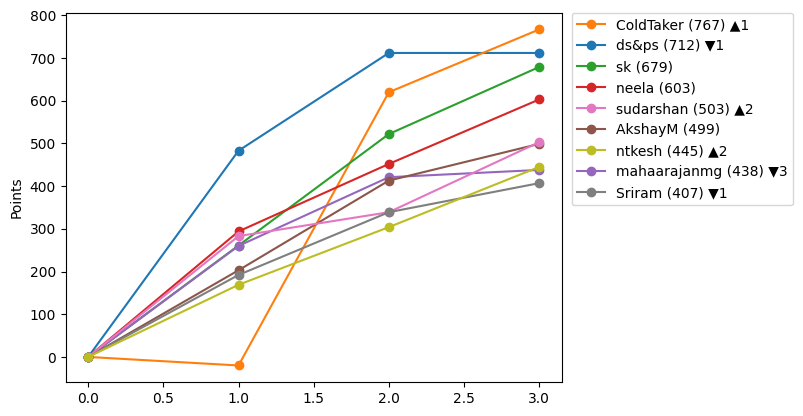

In [36]:
import matplotlib.pyplot as plt
ax = graph_scores.plot.line(marker='o')
#ax.set_xlabel("Days")
ax.set_ylabel("Points")
# Create legend labels with final scores, sorted by points (descending)
final_scores = graph_scores.iloc[-1]
sorted_cols = final_scores.sort_values(ascending=False).index

# Calculate position changes (if there are at least 2 days of data)
position_changes = {}
if len(graph_scores) >= 2:
    prev_scores = graph_scores.iloc[-2]
    prev_sorted = prev_scores.sort_values(ascending=False).index
    
    # Create position mappings
    prev_positions = {col: idx for idx, col in enumerate(prev_sorted)}
    curr_positions = {col: idx for idx, col in enumerate(sorted_cols)}
    
    # Calculate changes (negative means moved up, positive means moved down)
    for col in sorted_cols:
        if col in prev_positions:
            position_changes[col] = prev_positions[col] - curr_positions[col]
        else:
            position_changes[col] = 0
else:
    # No previous data, all changes are 0
    for col in sorted_cols:
        position_changes[col] = 0

# Get handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()
# Create a mapping of original column names to handles
handle_dict = dict(zip(graph_scores.columns, handles))
# Reorder handles and create new labels based on sorted columns with position change indicators
sorted_handles = [handle_dict[col] for col in sorted_cols]
sorted_labels = []
for col in sorted_cols:
    change = position_changes[col]
    if change > 0:
        # Upward triangle for improvement (will be colored green)
        indicator = f" ▲{change}"
    elif change < 0:
        # Downward triangle for decline (will be colored red)
        indicator = f" ▼{abs(change)}"
    else:
        indicator = ""
    sorted_labels.append(f"{col} ({int(final_scores[col])}){indicator}")

legend = plt.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig(leaderboard_graph_file, bbox_inches="tight")
plt.show()

In [ ]:
scores_sorted = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}
score_msg = str(scores_sorted)

scores_msg_df = pd.DataFrame(
    scores_sorted.items(),
    columns=['Manager', 'Points']
)
leaderboard_table = f'*{day.upper()}*\n```\n{scores_msg_df.to_markdown(index=False)}\n```'
print()
with open(leaderboard_file, 'w') as f:
    f.write(leaderboard_table)